In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
amanalisiddiqui_fraud_detection_dataset_path = kagglehub.dataset_download('amanalisiddiqui/fraud-detection-dataset')

print('Data source import complete.')


Using Colab cache for faster access to the 'fraud-detection-dataset' dataset.
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection-dataset/AIML Dataset.csv


In [3]:
df = pd.read_csv(f"{amanalisiddiqui_fraud_detection_dataset_path}/AIML Dataset.csv")

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(style ='whitegrid')

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


In [9]:
df['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


In [10]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [11]:
df.shape

(6362620, 11)

In [12]:
round((df['isFraud'].value_counts()[1] / df.shape[0]) * 100, 2)

np.float64(0.13)

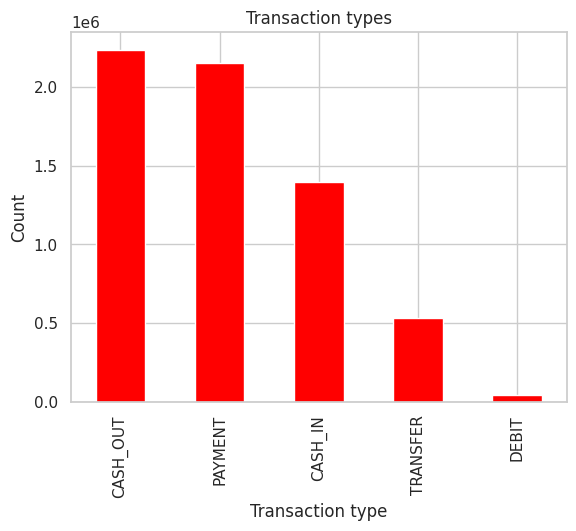

In [13]:
df['type'].value_counts().plot(kind='bar', title='Transaction types', color = 'Red')
plt.xlabel('Transaction type')
plt.ylabel('Count')
plt.show()

In [14]:
fraud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending = False)

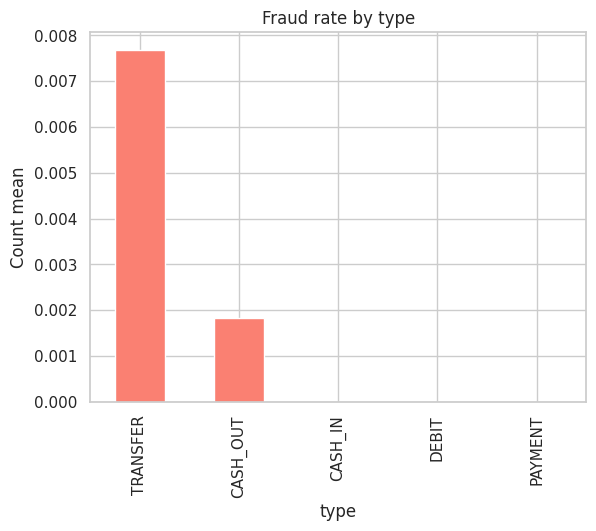

In [15]:
fraud_by_type.plot(kind='bar', title = 'Fraud rate by type', color = 'salmon')
plt.xlabel('type')
plt.ylabel('Count mean')
plt.show()

In [16]:
df['amount'].describe().astype(int)

,amount
count,6362620
mean,179861
std,603858
min,0
25%,13389
50%,74871
75%,208721
max,92445516


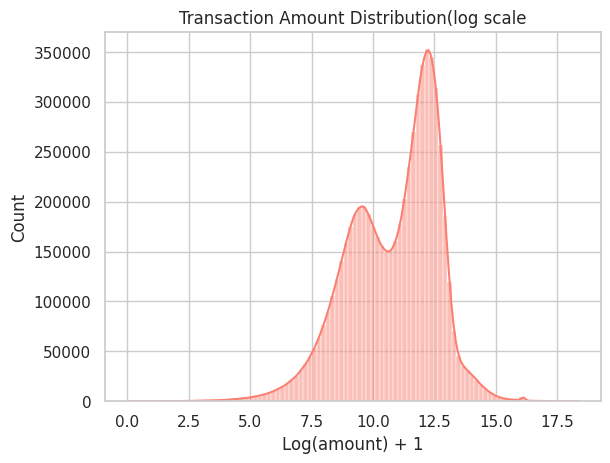

In [17]:
sns.histplot(np.log1p(df['amount']), bins = 100, kde = True, color = 'salmon')
plt.title('Transaction Amount Distribution(log scale')
plt.xlabel('Log(amount) + 1')
plt.show()

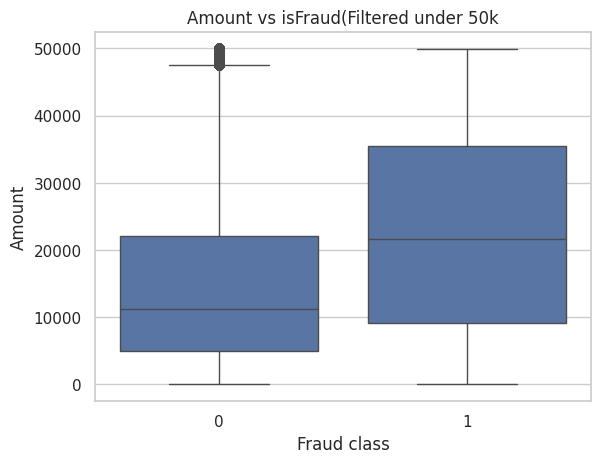

In [18]:
sns.boxplot(data= df[df['amount'] < 50000], x = 'isFraud', y = 'amount' )
plt.title('Amount vs isFraud(Filtered under 50k')
plt.xlabel('Fraud class')
plt.ylabel('Amount')
plt.show()

In [19]:
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

In [20]:
(df['balanceDiffOrig'] < 0).sum()

np.int64(1399253)

In [21]:
(df['balanceDiffDest'] < 0).sum()

np.int64(1238864)

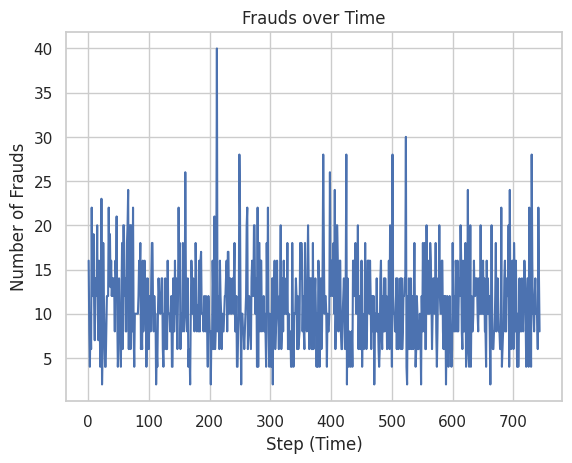

In [22]:
fraud_per_step = df[df['isFraud'] == 1]['step'].value_counts().sort_index()
plt.plot(fraud_per_step.index, fraud_per_step.values, label = 'Fraud per step')
plt.xlabel('Step (Time)')
plt.ylabel('Number of Frauds')
plt.title('Frauds over Time')
plt.grid(True)
plt.show()

In [23]:
df.drop(columns = ['step'], inplace = True)

In [24]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [25]:
top_senders = df['nameOrig'].value_counts().head(10)

In [26]:
top_senders

,count
nameOrig,
C1530544995,3
C545315117,3
C724452879,3
C1784010646,3
C1677795071,3
C1462946854,3
C1065307291,3
C1999539787,3
C2098525306,3


In [27]:
top_recievers = df['nameDest'].value_counts().head(10)

In [28]:
top_recievers

,count
nameDest,
C1286084959,113
C985934102,109
C665576141,105
C2083562754,102
C248609774,101
C1590550415,101
C1789550256,99
C451111351,99
C1360767589,98


In [29]:
fraud_users = df[df['isFraud'] == 1]['nameOrig'].value_counts().head(10)

In [30]:
fraud_users

,count
nameOrig,
C1280323807,1
C1305486145,1
C840083671,1
C1420196421,1
C2101527076,1
C1039979813,1
C2089752665,1
C1614818636,1
C40604503,1


In [31]:
fraud_type = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])]

In [32]:
fraud_type['type'].value_counts()

,count
type,
CASH_OUT,2237500
TRANSFER,532909


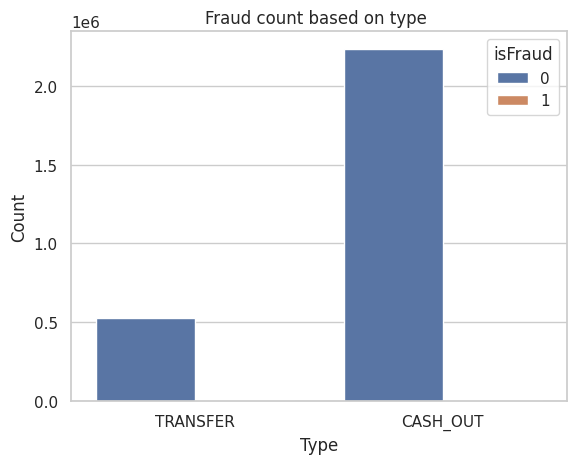

In [33]:
sns.countplot(data = fraud_type, x = 'type', hue = 'isFraud')
plt.title('Fraud count based on type ')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   type             object 
 1   amount           float64
 2   nameOrig         object 
 3   oldbalanceOrg    float64
 4   newbalanceOrig   float64
 5   nameDest         object 
 6   oldbalanceDest   float64
 7   newbalanceDest   float64
 8   isFraud          int64  
 9   isFlaggedFraud   int64  
 10  balanceDiffOrig  float64
 11  balanceDiffDest  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 582.5+ MB


In [35]:
numerical_col = df.select_dtypes(['int64', 'float64'])

In [36]:
numerical_col.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,9839.64,0.0
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,1864.28,0.0
2,181.00,181.0,0.00,0.0,0.0,1,0,181.00,0.0
3,181.00,181.0,0.00,21182.0,0.0,1,0,181.00,-21182.0
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,11668.14,0.0


In [37]:
numerical_col.drop(columns=['balanceDiffOrig', 'isFlaggedFraud', 'balanceDiffDest'], inplace = True)

In [38]:
corr = numerical_col.corr()

In [39]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


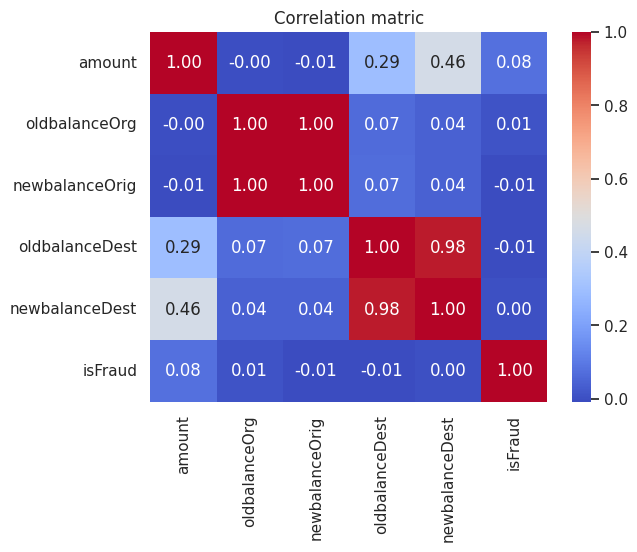

In [40]:
sns.heatmap(corr, annot = True, cmap ='coolwarm', fmt = '.2f')
plt.title('Correlation matric')
plt.show()

In [41]:
zero_after_transfer = df[
    (df['oldbalanceOrg'] > 0) &
    (df['newbalanceOrig'] == 0) &
    (df['type'].isin(['TRANSFER', 'CASH_OUT']))
]

In [42]:
len(zero_after_transfer)

1188074

In [43]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [44]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [46]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [47]:
df1 = df.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)

In [48]:
df1.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'balanceDiffOrig', 'balanceDiffDest'],
      dtype='object')

In [49]:
categorical_col = df1.select_dtypes(['object', 'category'])

In [50]:
numerical_col = df1.select_dtypes(['float64', 'int64'])

In [51]:
numerical_col.drop(columns=[ 'isFraud', 'balanceDiffOrig', 'balanceDiffDest'], inplace = True)

In [52]:
y = df1['isFraud']
x = df1.drop('isFraud', axis = 1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y)

In [54]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'balanceDiffOrig', 'balanceDiffDest']),
        ('cat', OneHotEncoder(drop= 'first', handle_unknown='ignore'), ['type'])
    ],
    remainder= 'drop'
)

In [55]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('clf', LogisticRegression(class_weight = 'balanced', max_iter = 1000))
])

In [56]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'balanceDiffOrig',
                                                   'balanceDiffDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [61]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression

pipeline = ImbPipeline([
    ('prep', preprocessor),
    ('adasyn', ADASYN(sampling_strategy='minority')),
    ('clf', LogisticRegression(class_weight = 'balanced', max_iter = 1000))
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'balanceDiffOrig',
                                                   'balanceDiffDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['type'])])),
                ('adasyn', ADASYN(sampling_strategy='minority')),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [62]:
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93   1906322
           1       0.01      0.96      0.02      2464

    accuracy                           0.87   1908786
   macro avg       0.50      0.92      0.48   1908786
weighted avg       1.00      0.87      0.93   1908786



In [ ]:
print(confusion_matrix(y_test, y_pred))

In [63]:
from sklearn.ensemble import RandomForestClassifier

pipeline_rfc = ImbPipeline([
    ('prep', preprocessor),
    ('adasyn', ADASYN(sampling_strategy='minority')),
    ('rfc', RandomForestClassifier(n_estimators = 50, criterion = 'gini'))
])

In [64]:
pipeline_rfc.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'balanceDiffOrig',
                                                   'balanceDiffDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['type'])])),
                ('adasyn', ADASYN(sampling_strategy='minority')),
                ('rfc', RandomForestClassifier(n_estimators=50))])

In [66]:
y_pred = pipeline_rfc.predict(X_test)

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.66      0.98      0.79      2464

    accuracy                           1.00   1908786
   macro avg       0.83      0.99      0.90   1908786
weighted avg       1.00      1.00      1.00   1908786



In [68]:
print(confusion_matrix(y_test, y_pred))

[[1905109    1213]
 [     58    2406]]


In [71]:
pipeline.score(X_test, y_test) * 100

87.35012725365756

In [72]:
pipeline_rfc.score(X_test, y_test) * 100

99.93341317465656

In [73]:
import joblib

joblib.dump(pipeline_rfc, "fraud_detection.pkl")

['fraud_detection.pkl']